####  VIVA HEART
Author: Shambhavi Dubey, Swastik Sahu, Sandeep Kumar Gupta, Rahul Tiwari <br> Course: Final Year Major Project – B.Tech CSE <br> Objective: Build a robust ML model to detect heart disease from patient data.

#### 1. Introduction

Heart disease is one of the leading causes of death globally. Early diagnosis using machine learning can help in timely intervention.<br>This project aims to build a predictive model using multiple patient datasets and explore various preprocessing, modeling, and optimization techniques.

 #### 2. Data Collection and Merging

We use 4 datasets: Cleveland, Hungarian, Long Beach VA, and Switzerland.<br>They are preprocessed and merged into a single unified dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# File paths
file_paths = {
    "cleveland": "cleveland.data",
    "hungarian": "hungarian.data",
    "long_beach_va": "long-beach-va.data",
    "switzerland": "switzerland.data"
}

In [3]:
# Loading datasets into pandas DataFrames
datasets = {}
for name, path in file_paths.items():
    datasets[name] = pd.read_csv(path, header=None)

In [4]:
# Showing basic shape and first few rows to know about format of dataset
info_summary = {}
for name, df in datasets.items():
    info_summary[name] = {
        "shape": df.shape,
        "head": df.head(3)
    }

In [5]:
info_summary

{'cleveland': {'shape': (303, 14),
  'head':      0    1    2      3      4    5    6      7    8    9    10   11   12  13
  0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
  1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
  2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1},
 'hungarian': {'shape': (294, 14),
  'head':    0   1   2    3    4  5  6    7  8    9  10 11 12  13
  0  28   1   2  130  132  0  2  185  0  0.0  ?  ?  ?   0
  1  29   1   2  120  243  0  0  160  0  0.0  ?  ?  ?   0
  2  29   1   2  140    ?  0  0  170  0  0.0  ?  ?  ?   0},
 'long_beach_va': {'shape': (200, 14),
  'head':    0   1   2    3    4  5   6    7  8    9  10 11 12  13
  0  63   1   4  140  260  0   1  112  1    3  2  ?  ?   2
  1  44   1   4  130  209  0   1  127  0    0  ?  ?  ?   0
  2  60   1   4  132  218  0   1  140  1  1.5  3  ?  ?   2},
 'switzerland': {'shape': (123, 14),
  'head':    0   1   2    3   4  5  

In [6]:
# Defining correct column names from UCI dataset
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

In [7]:
# Cleaning and preparing each dataset
cleaned_datasets = []
for name, df in datasets.items():
    df.columns = columns                      # Assigning column names
    df.replace(['?', '.'], np.nan, inplace=True)  # Replace ? and . with NaN
    df['source'] = name                       # Add source column
    cleaned_datasets.append(df)        # takes the DataFrame df at that moment and adds it as a new, separate item to the cleaned_datasets list. 

In [8]:
# Concatenating all datasets into one
merged_data = pd.concat(cleaned_datasets, ignore_index=True)

In [9]:
# Converting all columns to numeric (excluding 'source')
for col in merged_data.columns:
    if col != 'source':
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

In [10]:
# Showing shape and a sample of newly merged dataset
merged_data.shape, merged_data.head(5)

((920, 15),
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
 1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
 2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
 3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
 4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
 
    slope   ca  thal  target     source  
 0    3.0  0.0   6.0       0  cleveland  
 1    2.0  3.0   3.0       2  cleveland  
 2    2.0  2.0   7.0       1  cleveland  
 3    3.0  0.0   3.0       0  cleveland  
 4    1.0  0.0   3.0       0  cleveland  )

In [11]:
# Saving a csv file of merged dataset to use in future.
import os

output_folder = r"C:\Users\shaiv\OneDrive\Desktop\Major_Project"  
file_name = "merged_data.csv"

output_path = os.path.join(output_folder, file_name)
merged_data.to_csv(output_path, index=False)

print(f"The merged data has been successfully saved to: {output_path}")

The merged data has been successfully saved to: C:\Users\shaiv\OneDrive\Desktop\Major_Project\merged_data.csv


### 3. Data Cleaning and Preprocessing
3.1 Handle missing values<br>
3.2 Encode categorical features<br>
3.3 Normalize/standardize numerical features<br>
3.4 Perform EDA (visualization, correlation)

##### 3.1 Checking for missing values

In [12]:
merged_data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
source        0
dtype: int64

In [13]:
missing_values = merged_data.isnull().sum()
missing_values[missing_values > 0]

trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [14]:
# Appling the most suitable imputation technique for each column:-
# Numerical columns with median (more robust to outliers)
# Categorical columns with mode

In [15]:
# Defining columns by type
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "target"]

In [16]:
# Imputing numerical columns with median
for col in numerical_cols:
    median_value = merged_data[col].median()
    merged_data[col] = merged_data[col].fillna(median_value)

In [17]:
# Imputing categorical columns with mode
for col in categorical_cols:
    median_value = merged_data[col].median()
    merged_data[col] = merged_data[col].fillna(median_value)

In [18]:
# Checking again for any remaining missing values
merged_data.isnull().sum().sum() # Total number of missing values remaining

0

##### 3.2 Encoding Categorical Values

In [19]:
# Excluding "thal" and "taregt" to Convert them to Binary Classification mannually beacause this label enconding can compromise 
# with their actual meanings
categorical_cols1 = ["sex", "cp", "fbs", "restecg", "exang", "slope"]

In [20]:
from sklearn.preprocessing import LabelEncoder
processed_data = merged_data.copy()              # Copying the data to avoid modifying original

# Appling Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_cols1:
    le = LabelEncoder()
    processed_data[col] = le.fit_transform(processed_data[col])
    label_encoders[col] = le

In [21]:
# Checking Encoded Values
for col in ["sex", "cp", "fbs", "restecg", "exang", "slope"]:
    print(f"{col} unique encoded values:", processed_data[col].unique())

sex unique encoded values: [1 0]
cp unique encoded values: [0 3 2 1]
fbs unique encoded values: [1 0]
restecg unique encoded values: [2 0 1]
exang unique encoded values: [0 1]
slope unique encoded values: [2 1 0]


In [22]:
for col in categorical_cols1:
    le = label_encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\nEncoding for '{col}':")
    print(mapping)


Encoding for 'sex':
{0.0: 0, 1.0: 1}

Encoding for 'cp':
{1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3}

Encoding for 'fbs':
{0.0: 0, 1.0: 1}

Encoding for 'restecg':
{0.0: 0, 1.0: 1, 2.0: 2}

Encoding for 'exang':
{0.0: 0, 1.0: 1}

Encoding for 'slope':
{1.0: 0, 2.0: 1, 3.0: 2}


In [23]:
# Now lets classify "thal" to meaningfull variables
# The original thal values are:
# 3 → normal
# 6 → fixed defect
# 7 → reversible defect
# Let’s remap it manually to retain meaning.

In [24]:
thal_mapping = {3.0: 'normal', 6.0: 'fixed', 7.0: 'reversible'}
processed_data['thal'] = processed_data['thal'].map(thal_mapping)

In [25]:
processed_data['thal'] = le.fit_transform(processed_data['thal'])

#See the final mapping
print("Updated 'thal' encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

Updated 'thal' encoding: {'fixed': 0, 'normal': 1, 'reversible': 2}


In [26]:
# Now let's convert target to Binary Classification
processed_data['target'] = processed_data['target'].apply(lambda x: 1 if x > 0 else 0)

In [27]:
processed_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0.0,0,0,cleveland
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3.0,1,1,cleveland
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2.0,2,1,cleveland
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,1,0,cleveland
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0.0,1,0,cleveland


##### 3.3 Normalizing/standardizing numerical features

In [28]:
# Without scaling, features like cholesterol (which can be 300+) may dominate age or resting blood pressure.
# Some ML models (like Logistic Regression, KNN, SVM) are sensitive to the magnitude of features
# We’ll use StandardScaler from sklearn.preprocessing to scale these features so they have:
# 1. Mean = 0
# 2. Standard deviation = 1

In [29]:
numerical_cols_tobe_standardized = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_data[numerical_cols] = scaler.fit_transform(processed_data[numerical_cols])

processed_data[numerical_cols].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02
mean,6.178632e-17,-7.723291e-18,-9.267949e-17,-3.707179e-16,-3.089316e-17,6.178632e-17
std,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00
min,-2.708286e+00,-7.157623e+00,-1.834346e+00,-3.091427e+00,-3.265577e+00,-3.613997e-01
25%,-6.912073e-01,-6.504787e-01,-2.033264e-01,-7.039908e-01,-8.068863e-01,-3.613997e-01
50%,5.192709e-02,-1.082166e-01,2.118840e-01,9.182113e-02,-3.340612e-01,-3.613997e-01
75%,6.888994e-01,4.340454e-01,6.156245e-01,7.284707e-01,6.115890e-01,-3.613997e-01
max,2.493654e+00,3.687618e+00,3.698734e+00,2.558838e+00,5.056145e+00,4.411152e+00


In [30]:
output_folder = r"C:\Users\shaiv\OneDrive\Desktop\Major_Project"  
file_name = "processed_data.csv"

output_path = os.path.join(output_folder, file_name)
processed_data.to_csv(output_path, index=False)

print(f"The processed data has been successfully saved to: {output_path}")

The processed data has been successfully saved to: C:\Users\shaiv\OneDrive\Desktop\Major_Project\processed_data.csv


##### 3.4 Performing EDA (correlation etc)

In [31]:
# 1. Correlation Heatmap
# Identify which features are strongly correlated with the target (heart disease).

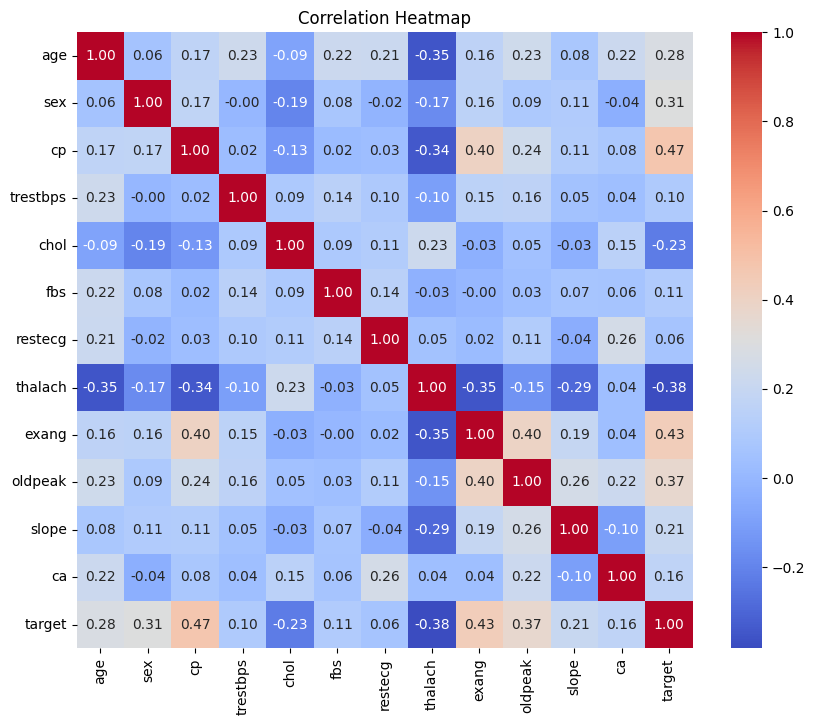

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = processed_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

### 4. Balancing the Dataset
We apply oversampling, undersampling, and class weight adjustments to address class imbalance.

In [33]:
#  Checkingfor Imbalance in target
class_counts = processed_data['target'].value_counts().sort_index()

print("Class distribution:")
print(class_counts)

Class distribution:
target
0    411
1    509
Name: count, dtype: int64


C:\Users\shaiv\AppData\Local\Temp\ipykernel_11168\3167125093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


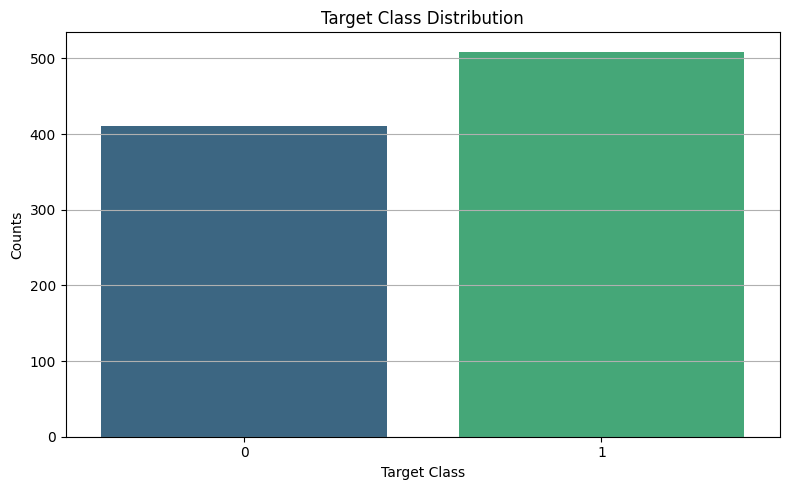

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Target Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Counts')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Let’s begin with Oversampling, which means increasing the number of minority class samples to balance the dataset.
1. Random Oversampling
2. SMOTE (Synthetic Minority Over-sampling Technique)
3. ADASYN (Adaptive Synthetic Sampling) 

In [38]:
# 1. Random Oversampling (Using RandomOverSampler)
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split

x = processed_data.drop(['target','source'], axis=1)
y = processed_data['target']

ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)

print("Before Oversampling:", Counter(y))
print("After Random Oversampling:", Counter(y_resampled))

Before Oversampling: Counter({1: 509, 0: 411})
After Random Oversampling: Counter({0: 509, 1: 509})


In [39]:
# Spliting the data for model training before SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred_rf_befsmote = rf.predict(x_test)

y_prob_rf_befsmote = rf.predict_proba(x_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_befsmote))
print("Precision:", precision_score(y_test, y_pred_rf_befsmote))
print("Recall:", recall_score(y_test, y_pred_rf_befsmote))
print("F1 Score:", f1_score(y_test, y_pred_rf_befsmote))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf_befsmote))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_befsmote))

Accuracy: 0.842391304347826
Precision: 0.8348623853211009
Recall: 0.8921568627450981
F1 Score: 0.8625592417061612
ROC AUC Score: 0.9112864658058345

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [43]:
# 2. Implementation of SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

x = processed_data.drop(columns=['target', 'source'], axis=1)
y = processed_data['target']

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

print("Before Oversampling:", Counter(y))
print("After Random Oversampling:", Counter(y_smote))

Before Oversampling: Counter({1: 509, 0: 411})
After Random Oversampling: Counter({0: 509, 1: 509})


In [44]:
# Spliting the data for model training after SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_rf_afsmote = rf.predict(x_test)

y_prob_rf_afsmote = rf.predict_proba(x_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_afsmote))
print("Precision:", precision_score(y_test, y_pred_rf_afsmote))
print("Recall:", recall_score(y_test, y_pred_rf_afsmote))
print("F1 Score:", f1_score(y_test, y_pred_rf_afsmote))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf_afsmote))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_afsmote))

Accuracy: 0.8088235294117647
Precision: 0.8461538461538461
Recall: 0.7549019607843137
F1 Score: 0.7979274611398963
ROC AUC Score: 0.9006151480199924

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.85      0.75      0.80       102

    accuracy                           0.81       204
   macro avg       0.81      0.81      0.81       204
weighted avg       0.81      0.81      0.81       204



#### Model Comparison before and after SMOTE

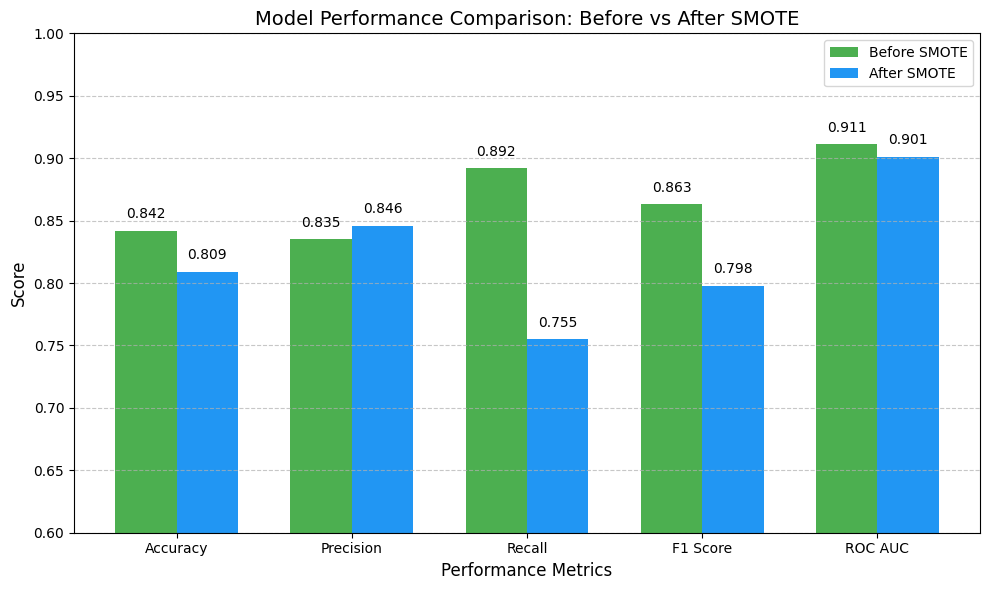

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
before = [0.842, 0.835, 0.892, 0.863, 0.911]
after = [0.809, 0.846, 0.755, 0.798, 0.901]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, before, width, label='Before SMOTE', color='#4CAF50')
bars2 = plt.bar(x + width/2, after, width, label='After SMOTE', color='#2196F3')

plt.xlabel('Performance Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison: Before vs After SMOTE', fontsize=14)
plt.xticks(x, metrics)
plt.ylim(0.6, 1.0)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i in range(len(metrics)):
    plt.text(x[i] - width/2, before[i] + 0.01, f"{before[i]:.3f}", ha='center')
    plt.text(x[i] + width/2, after[i] + 0.01, f"{after[i]:.3f}", ha='center')

plt.tight_layout()
plt.show()


In [48]:
y_pred_rf_befadasyn = rf.predict(x_test)

y_prob_rf_befadasyn = rf.predict_proba(x_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_befadasyn))
print("Precision:", precision_score(y_test, y_pred_rf_befadasyn))
print("Recall:", recall_score(y_test, y_pred_rf_befadasyn))
print("F1 Score:", f1_score(y_test, y_pred_rf_befadasyn))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf_befadasyn))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_befadasyn))

Accuracy: 0.8088235294117647
Precision: 0.8461538461538461
Recall: 0.7549019607843137
F1 Score: 0.7979274611398963
ROC AUC Score: 0.9006151480199924

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.85      0.75      0.80       102

    accuracy                           0.81       204
   macro avg       0.81      0.81      0.81       204
weighted avg       0.81      0.81      0.81       204



In [52]:
# 2. Implementation of ADASYN (Adaptive Synthetic Sampling)
from imblearn.over_sampling import ADASYN
from collections import Counter

x = processed_data.drop(columns=['target', 'source'], axis=1)

adasyn = ADASYN(random_state=42)
x_adasyn, y_adasyn = adasyn.fit_resample(x, y)

print("Before ADASYN:", Counter(y))
print("After ADASYN:", Counter(y_adasyn))

Before ADASYN: Counter({1: 509, 0: 411})
After ADASYN: Counter({1: 509, 0: 500})


##### Let’s begin with Undersampling, which simply removes samples from the majority class to match the minority class. 
This method is easy and fast, but it can lead to loss of potentially important information.
1. Random Undersampling
2. Tomek Links
3. ENN (Edited Nearest Neighbors)

In [53]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)

# Print class distribution before and after
print("Before Random Undersampling:", Counter(y))
print("After Random Undersampling:", Counter(y_rus))

Before Random Undersampling: Counter({1: 509, 0: 411})
After Random Undersampling: Counter({0: 411, 1: 411})


In [54]:
# We will not use other Undersampling techniques since Under sampling is used when:
# 1. You have a lot of majority class samples.
# 2. Training time is important.
# 3. You're okay with possibly losing information.

### 5. Model Building
a. We use 3 suitable ML algorithms as follows:-
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost (Extreme Gradient Boosting)
   
b. Each model is trained and evaluated on balanced data.

##### 1. Logistic Regression (Often used in medical fields to predict disease likelihood.)

In [55]:
# Spliting the data for model training
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_adasyn, y_adasyn, test_size=0.2, random_state=42, stratify=y_adasyn)

In [56]:
# 1. Training the First Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [57]:
# Prediction
y_pred_lr = lr.predict(x_test)
y_prob_lr = lr.predict_proba(x_test)[:, 1]                    #These probability is used for ROC curves, AUC score, etc.

In [58]:
# 1. Evaluating the First Model (Logistic Regression)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.7920792079207921
Precision: 0.8125
Recall: 0.7647058823529411
F1 Score: 0.7878787878787878
ROC AUC Score: 0.878921568627451

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.81      0.76      0.79       102

    accuracy                           0.79       202
   macro avg       0.79      0.79      0.79       202
weighted avg       0.79      0.79      0.79       202



##### 2. Random Forest Classifier (It works well with both linear and non-linear relationships.)

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred_rf = rf.predict(x_test)

y_prob_rf = rf.predict_proba(x_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8465346534653465
Precision: 0.8736842105263158
Recall: 0.8137254901960784
F1 Score: 0.8426395939086294
ROC AUC Score: 0.9101470588235294

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.87      0.81      0.84       102

    accuracy                           0.85       202
   macro avg       0.85      0.85      0.85       202
weighted avg       0.85      0.85      0.85       202



#### Model Comparison before and after SMOTE

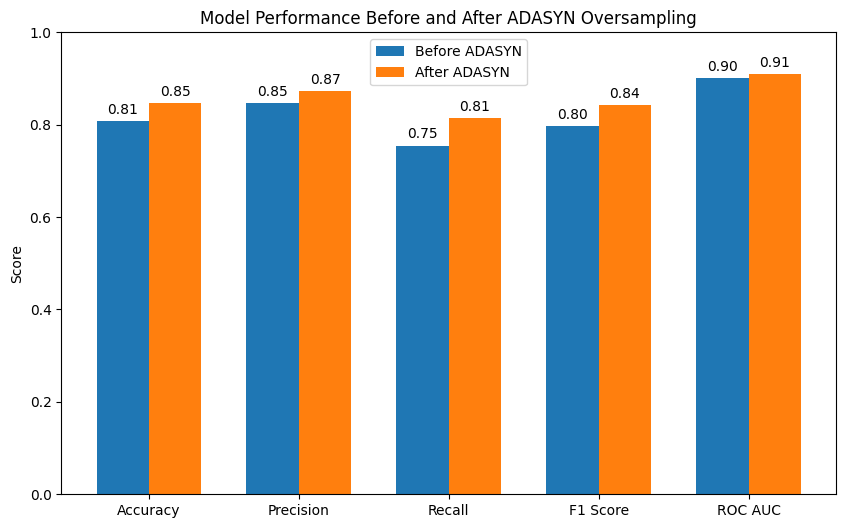

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
before = [0.8088, 0.8461, 0.7549, 0.7979, 0.9006]
after = [0.8465, 0.8737, 0.8137, 0.8426, 0.9101]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, before, width, label='Before ADASYN')
bars2 = ax.bar(x + width/2, after, width, label='After ADASYN')

# Add text labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

ax.set_ylabel('Score')
ax.set_title('Model Performance Before and After ADASYN Oversampling')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

plt.show()


##### 3. XGBoost (Extreme Gradient Boosting) (High prediction accuracy)

In [62]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier( eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [64]:
y_pred_xgb = xgb.predict(x_test)
y_prob_xgb = xgb.predict_proba(x_test)[:, 1] 

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.8217821782178217
Precision: 0.8367346938775511
Recall: 0.803921568627451
F1 Score: 0.82
ROC AUC Score: 0.8864705882352941

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.84      0.80      0.82       102

    accuracy                           0.82       202
   macro avg       0.82      0.82      0.82       202
weighted avg       0.82      0.82      0.82       202



### 6. Model Comparison Summary
Let’s create a side-by-side comparison table to visualize and compare the performance of all three models.

In [66]:
model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ]
}

comparison_df = pd.DataFrame(model_results)

print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.792079   0.812500  0.764706  0.787879  0.878922
1        Random Forest  0.846535   0.873684  0.813725  0.842640  0.910147
2              XGBoost  0.821782   0.836735  0.803922  0.820000  0.886471


#### Model Performance Comparison Before Optimization

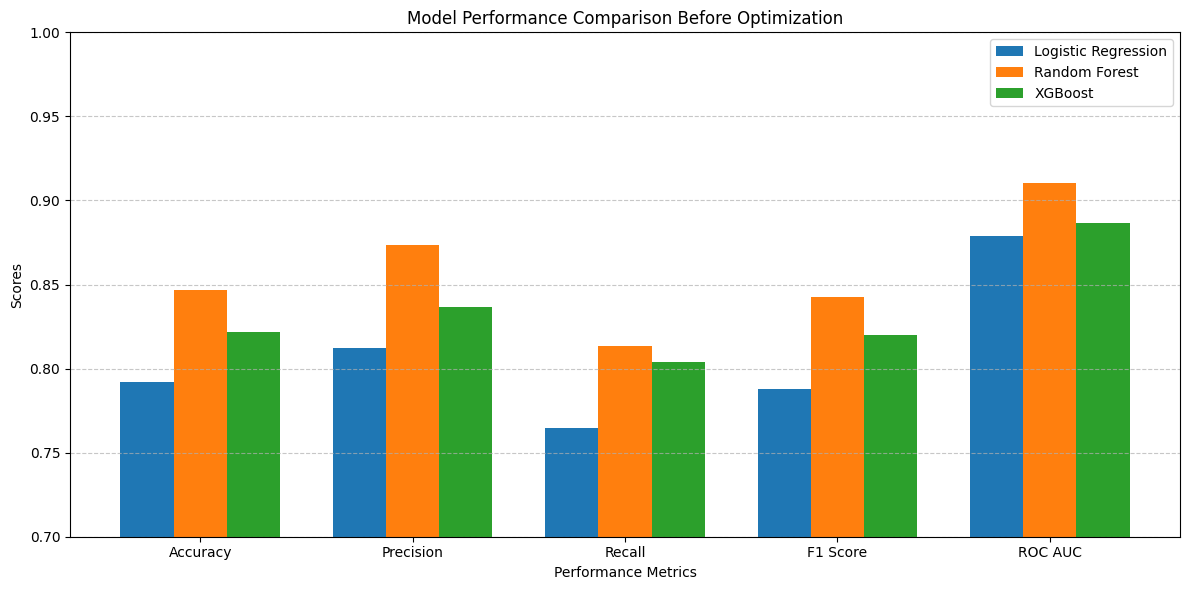

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Performance values
performance = {
    'Logistic Regression': [0.792079, 0.8125, 0.764706, 0.787879, 0.878922],
    'Random Forest': [0.846535, 0.873684, 0.813725, 0.842640, 0.910147],
    'XGBoost': [0.821782, 0.836735, 0.803922, 0.82, 0.886471]
}

# Plot settings
bar_width = 0.25
index = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each model
for i, model in enumerate(models):
    ax.bar(index + i*bar_width, performance[model], bar_width, label=model)

# Labels and titles
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison Before Optimization')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.set_ylim([0.7, 1.0])  # Adjust y-axis for better visualization

ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 7. Optimization Techniques
We improve model performance using modern optimization algorithms:
- GridSearchCV
- Optuna
- Ant Colony
- Honey Badger

##### 1. GridSearchCV for Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [69]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all processors
    verbose=2
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [70]:
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_rf.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(x_test)[:, 1])

print("Optimized Random Forest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Metrics:
Accuracy: 0.8465
Precision: 0.8737
Recall: 0.8137
F1 Score: 0.8426
ROC AUC: 0.9103


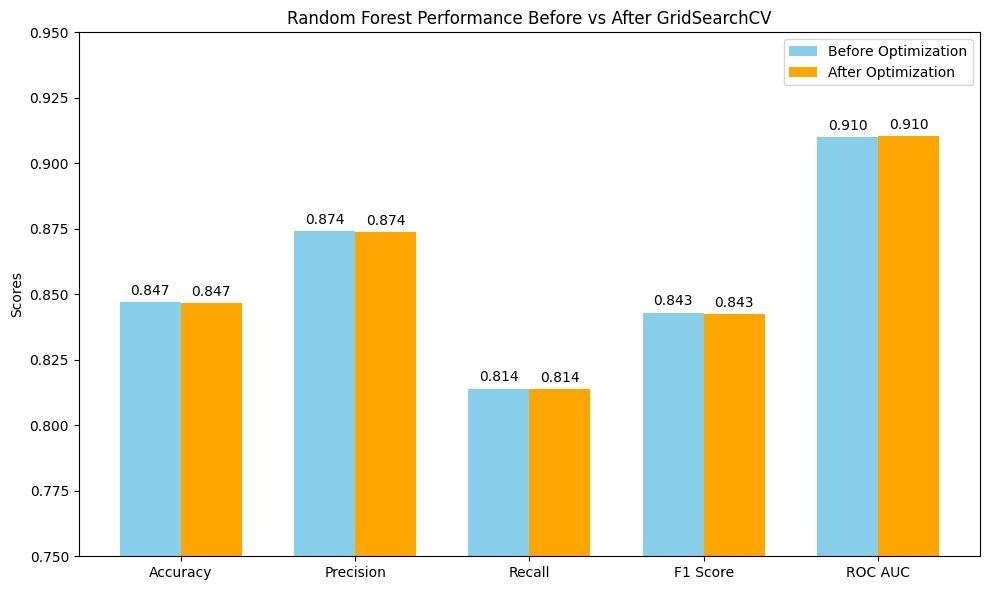

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Values before and after GridSearchCV optimization
before = [0.847, 0.874, 0.814, 0.843, 0.910]
after = [0.8465, 0.8737, 0.8137, 0.8426, 0.9103]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, before, width, label='Before Optimization', color='skyblue')
rects2 = ax.bar(x + width/2, after, width, label='After Optimization', color='orange')

# Labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Random Forest Performance Before vs After GridSearchCV')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.75, 0.95)
ax.legend()

# Attach value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


##### 2. Optuna for Random Forest

In [72]:
#!pip install optuna
import optuna

In [73]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred) 

In [74]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2025-06-03 15:15:44,340] A new study created in memory with name: no-name-b036c9ca-4860-4cd1-84a9-e112d4645613
[I 2025-06-03 15:15:45,076] Trial 0 finished with value: 0.8168316831683168 and parameters: {'n_estimators': 495, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.8168316831683168.
[I 2025-06-03 15:15:46,846] Trial 1 finished with value: 0.8267326732673267 and parameters: {'n_estimators': 984, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.8267326732673267.
[I 2025-06-03 15:15:47,634] Trial 2 finished with value: 0.8415841584158416 and parameters: {'n_estimators': 403, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 0.8415841584158416.
[I 2025-06-03 15:15:49,613] Trial 3 finished with value: 0.8366336633663366 and parameters: {'n_estimators': 923, 'max_depth': 16, 'mi

In [75]:
print("Best parameters:", study.best_params)
best_rf = RandomForestClassifier(**study.best_params, random_state=42)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)
y_prob = best_rf.predict_proba(x_test)[:, 1]

Best parameters: {'n_estimators': 194, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8465346534653465
Precision: 0.8514851485148515
Recall: 0.8431372549019608
F1 Score: 0.8472906403940886
ROC AUC: 0.9042156862745098


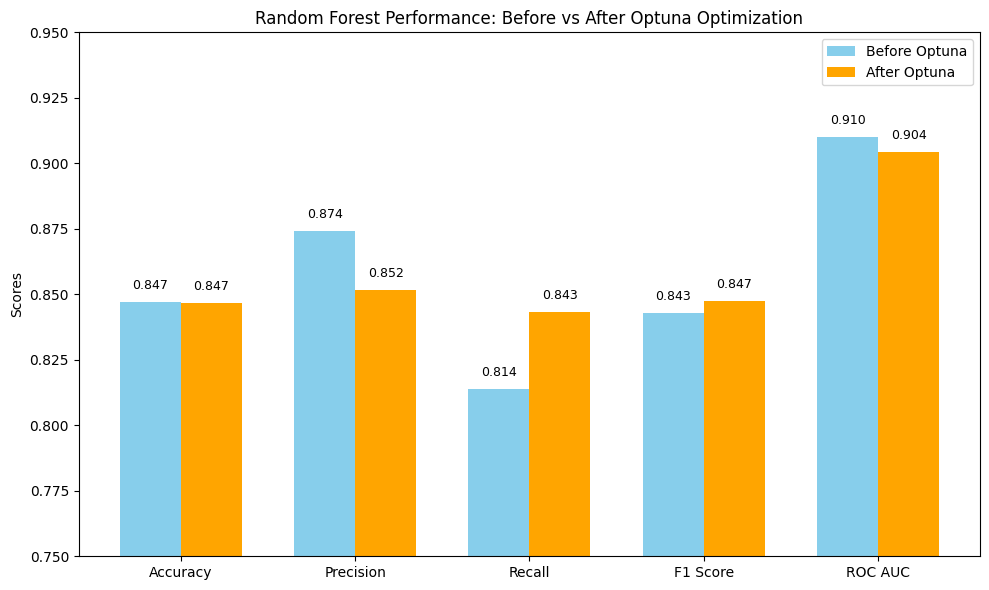

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
before_optuna = [0.847, 0.874, 0.814, 0.843, 0.910]
after_optuna = [0.8465, 0.8515, 0.8431, 0.8473, 0.9042]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, before_optuna, width, label='Before Optuna', color='skyblue')
bars2 = ax.bar(x + width/2, after_optuna, width, label='After Optuna', color='orange')

# Add text labels
for i in range(len(metrics)):
    ax.text(x[i] - width/2, before_optuna[i] + 0.005, f"{before_optuna[i]:.3f}", ha='center', fontsize=9)
    ax.text(x[i] + width/2, after_optuna[i] + 0.005, f"{after_optuna[i]:.3f}", ha='center', fontsize=9)

# Customize the plot
ax.set_ylabel('Scores')
ax.set_title('Random Forest Performance: Before vs After Optuna Optimization')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.75, 0.95)
ax.legend()
plt.tight_layout()
plt.show()


##### 2. Optuna for XGBoost

In [78]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    score = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=3).mean()
    return score

In [79]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)

[I 2025-06-03 15:22:52,370] A new study created in memory with name: no-name-d963e5ef-25e7-4d6e-842a-25afb233654e
C:\Users\shaiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:22:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shaiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:22:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shaiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:22:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-06-03 15:22:52,60

In [80]:
best_params_xgb = study_xgb.best_params
print("Best Parameters for XGBoost:", best_params_xgb)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params_xgb)
xgb_model.fit(x_train, y_train)

C:\Users\shaiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:22:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters for XGBoost: {'n_estimators': 229, 'max_depth': 5, 'learning_rate': 0.18794701010731318, 'subsample': 0.9442215984394002, 'colsample_bytree': 0.602721833381505, 'gamma': 1.6421084719824268, 'reg_alpha': 0.5725064049877734, 'reg_lambda': 1.6172930530991385}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.602721833381505, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=1.6421084719824268, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18794701010731318,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=229, n_jobs=None,
              num_parallel_tree=None, ...)

In [81]:
y_pred_xgb = xgb_model.predict(x_test)
y_prob_xgb = xgb_model.predict_proba(x_test)[:, 1]

acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc = roc_auc_score(y_test, y_prob_xgb)

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc}")

Accuracy: 0.8366336633663366
Precision: 0.8556701030927835
Recall: 0.8137254901960784
F1 Score: 0.8341708542713567
ROC AUC: 0.8986274509803921


##### 2. Optuna for Logistic Regression

In [82]:
def objective(trial):
    # Suggest hyperparameters to tune
    C = trial.suggest_loguniform('C', 1e-4, 100)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear'  # supports both l1 and l2

    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()
    return score

In [83]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-06-03 15:23:01,461] A new study created in memory with name: no-name-d11ef4b7-dfde-438c-ba3e-6bd169afebe8
C:\Users\shaiv\AppData\Local\Temp\ipykernel_11168\2789991255.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 100)
[I 2025-06-03 15:23:01,509] Trial 0 finished with value: 0.4956675101602638 and parameters: {'C': 0.0007847985722207973, 'penalty': 'l1'}. Best is trial 0 with value: 0.4956675101602638.
C:\Users\shaiv\AppData\Local\Temp\ipykernel_11168\2789991255.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 100)
[I 2025-06-03 15:23:01,617] Trial 1 finished with value: 0.80

In [84]:
best_params = study.best_params
lr_opt = LogisticRegression(**best_params, solver='liblinear', max_iter=1000)
lr_opt.fit(x_train, y_train)
y_pred = lr_opt.predict(x_test)
y_prob = lr_opt.predict_proba(x_test)[:, 1]

In [85]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [86]:
print("\nOptimized Logistic Regression Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")


Optimized Logistic Regression Results:
Accuracy: 0.7921
Precision: 0.8125
Recall: 0.7647
F1 Score: 0.7879
ROC AUC: 0.8789


### 8. Visualize Final Comparisons (Bar Chart of Metrics)
We’ll create a bar chart comparing the following metrics for all three optimized models:
1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. ROC AUC

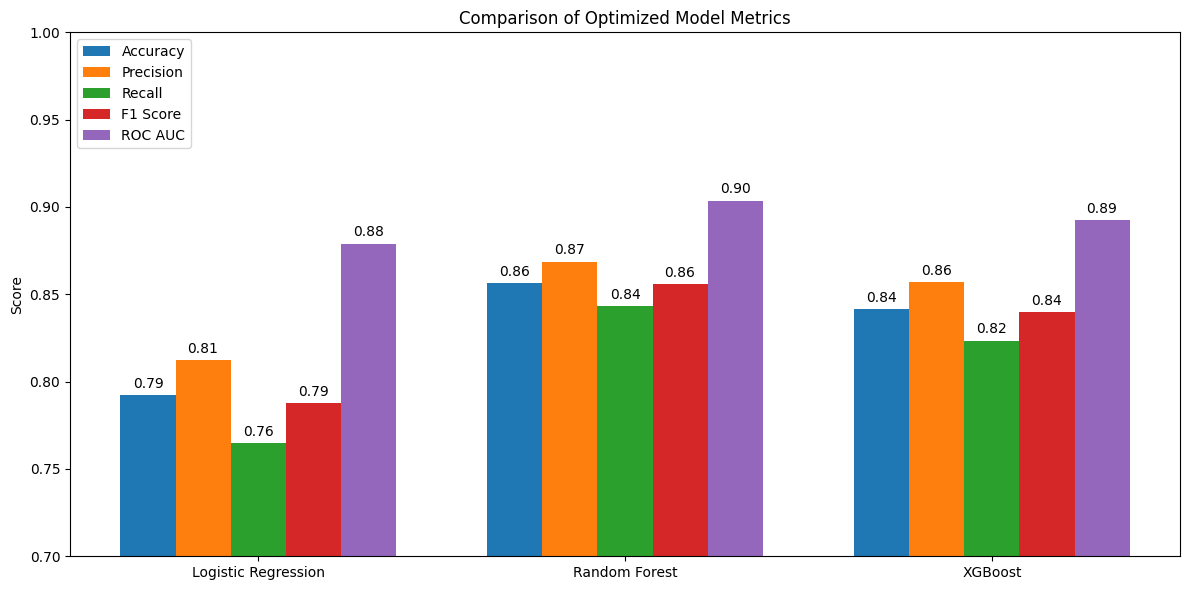

In [87]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.7921, 0.8564, 0.8416]
precision = [0.8125, 0.8687, 0.8571]
recall = [0.7647, 0.8431, 0.8235]
f1 = [0.7879, 0.8557, 0.84]
roc_auc = [0.8790, 0.9037, 0.8927]

# Grouped bar chart setup
x = np.arange(len(models))  # label locations
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1, width, label='F1 Score')
rects5 = ax.bar(x + 2*width, roc_auc, width, label='ROC AUC')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Comparison of Optimized Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.7, 1.0)
ax.legend(loc='upper left')

# Value labels on top
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

for rect_set in [rects1, rects2, rects3, rects4, rects5]:
    add_labels(rect_set)

plt.tight_layout()
plt.show()

### 9. Prediction with Optimized Random Forest

In [88]:
new_patient_data = np.array([[58, 1, 2, 130, 250, 0, 1, 150, 0, 1.0, 2, 0.0, 2]]) 
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
new_patient_scaled = scaler1.fit_transform(new_patient_data)

In [89]:
prediction = best_rf.predict(new_patient_scaled)
prediction_proba = best_rf.predict_proba(new_patient_scaled)[0][1]

C:\Users\shaiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\shaiv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [90]:
if prediction[0] == 1:
    print(f"🔴 High Risk of Heart Disease (Probability: {prediction_proba:.2f})")
else:
    print(f"🟢 Low Risk of Heart Disease (Probability: {prediction_proba:.2f})")

🟢 Low Risk of Heart Disease (Probability: 0.10)


### 10. Loading the Optimized Random Forest Model and Scaler to make a GUI

In [91]:
import pickle

with open("optimized_random_forest.pkl", "wb") as f:
    pickle.dump(best_rf, f)

In [92]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)